<a href="https://colab.research.google.com/github/LazaroR-u/EDA/blob/main/Saratoga%20Houses/Saratoga_houses_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import style


In [3]:
# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv("https://raw.githubusercontent.com/LazaroR-u/EDA/main/data/SaratogaHouses.csv", sep=",")
df.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [5]:
#Renombramos las columnas
df.columns= ["precio", "metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios", 
                 "chimenea", "banyos", "habitaciones", "calefaccion",
                 "consumo_calefacion", "desague", "vistas_lago",
                 "nueva_construccion", "aire_acondicionado"]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio              1728 non-null   int64  
 1   metros_totales      1728 non-null   float64
 2   antiguedad          1728 non-null   int64  
 3   precio_terreno      1728 non-null   int64  
 4   metros_habitables   1728 non-null   int64  
 5   universitarios      1728 non-null   int64  
 6   dormitorios         1728 non-null   int64  
 7   chimenea            1728 non-null   int64  
 8   banyos              1728 non-null   float64
 9   habitaciones        1728 non-null   int64  
 10  calefaccion         1728 non-null   object 
 11  consumo_calefacion  1728 non-null   object 
 12  desague             1728 non-null   object 
 13  vistas_lago         1728 non-null   object 
 14  nueva_construccion  1728 non-null   object 
 15  aire_acondicionado  1728 non-null   object 
dtypes: flo

##ANALISIS EXPLORATORIO DE DATOS

In [7]:
df.head()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
precio,1728.0,211966.705440,98441.391015,5000.0,145000.00,189900.00,259000.00,775000.0
metros_totales,1728.0,0.500214,0.698680,0.0,0.17,0.37,0.54,12.2
antiguedad,1728.0,27.916088,29.209988,0.0,13.00,19.00,34.00,225.0
precio_terreno,1728.0,34557.187500,35021.168056,200.0,15100.00,25000.00,40200.00,412600.0
metros_habitables,1728.0,1754.975694,619.935553,616.0,1300.00,1634.50,2137.75,5228.0
universitarios,1728.0,55.567708,10.333581,20.0,52.00,57.00,64.00,82.0
dormitorios,1728.0,3.154514,0.817351,1.0,3.00,3.00,4.00,7.0
chimenea,1728.0,0.601852,0.556102,0.0,0.00,1.00,1.00,4.0
banyos,1728.0,1.900174,0.658352,0.0,1.50,2.00,2.50,4.5
habitaciones,1728.0,7.041667,2.316453,2.0,5.00,7.00,8.25,12.0


###Buscando NANs 

In [9]:
#tama;o total de nuestros datos
df.shape

(1728, 16)

In [10]:
df.isna().sum().sort_values()

precio                0
metros_totales        0
antiguedad            0
precio_terreno        0
metros_habitables     0
universitarios        0
dormitorios           0
chimenea              0
banyos                0
habitaciones          0
calefaccion           0
consumo_calefacion    0
desague               0
vistas_lago           0
nueva_construccion    0
aire_acondicionado    0
dtype: int64

En este conjunto de datos no tenemos NANs. 

### Estudio de la distribucion de la variable target

Vamos a graficar como estan distribuidos los precios de las casas en nuestro dataframe. 

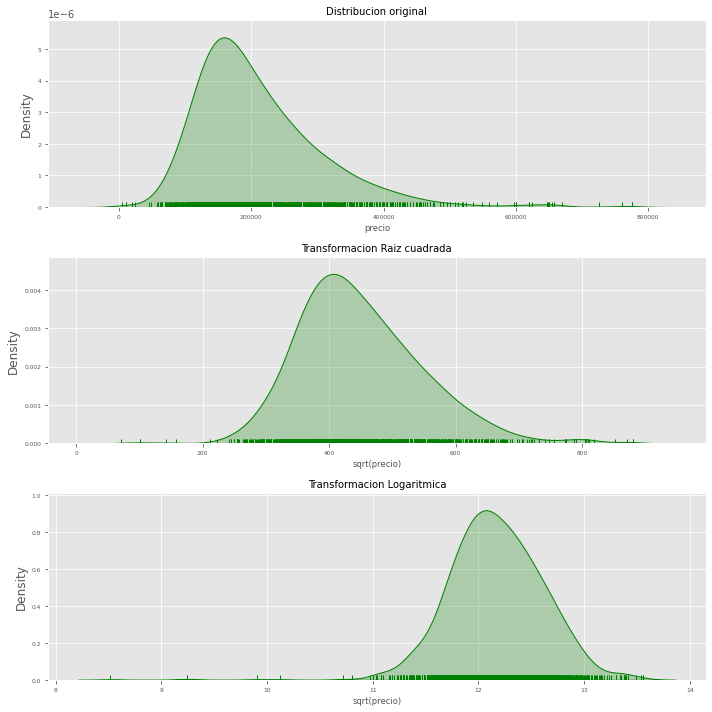

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize= (10,10))

#
sns.distplot(
    df["precio"], hist = False, rug = True, color = "green", 
             kde_kws={"shade" : True, "linewidth" : 1}, ax = axes[0] 
             )

axes[0].set_title("Distribucion original", fontsize = "medium")
axes[0].set_xlabel("precio", fontsize = "small")
axes[0].tick_params(labelsize = 6)

#
sns.distplot(
    np.sqrt(df["precio"]), hist = False, rug = True, color = "green", 
             kde_kws={"shade" : True, "linewidth" : 1}, ax = axes[1] 
             )

axes[1].set_title("Transformacion Raiz cuadrada", fontsize = "medium")
axes[1].set_xlabel("sqrt(precio)", fontsize = "small")
axes[1].tick_params(labelsize = 6)

#
sns.distplot(
    np.log(df["precio"]), hist = False, rug = True, color = "green", 
             kde_kws={"shade" : True, "linewidth" : 1}, ax = axes[2] 
             )

axes[2].set_title("Transformacion Logaritmica", fontsize = "medium")
axes[2].set_xlabel("sqrt(precio)", fontsize = "small")
axes[2].tick_params(labelsize = 6)

fig.tight_layout()


Veamos que tipo de distribucion se ajusta mejor a estos datos usando la libreria **fitter**.

In [12]:
!pip install fitter

     |████████████████████████████████| 47 kB 3.3 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25025 sha256=ebe2e06083dcb48f89b20f2b9351156fc85bd8ea5108ca657fae35cbdf2ee6f3
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=42e704f039958b155d24d53c3b28c0935ae0f25f110142e083fbb9acd1c5d922
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


In [13]:
from fitter import Fitter, get_common_distributions

,sumsquare_error,aic,bic,kl_div
beta,2.497420e-11,3068.852573,-55037.908642,inf
logistic,4.913880e-11,3147.967019,-53883.297831,inf
cauchy,5.221450e-11,2956.669693,-53778.388707,inf
chi2,5.776892e-11,3321.818880,-53596.249282,inf
norm,6.947514e-11,3324.534158,-53284.856663,inf
expon,2.915346e-10,2824.103160,-50806.577128,inf
powerlaw,3.078034e-10,2741.669837,-50705.287086,inf
exponpow,4.841645e-10,inf,-49922.566370,NaN
gamma,4.841645e-10,inf,-49922.566370,3.958212


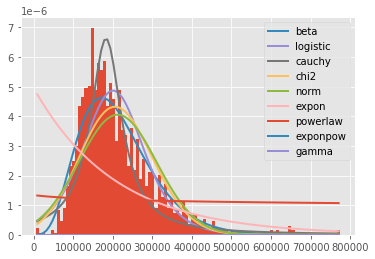

In [14]:
distribuciones = ["cauchy", "chi2", "expon", "exponpow", "gamma", "norm", "powerlaw", "beta", "logistic"]

fitter = Fitter(df.precio, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest = 10, plot = True)

La distribucion que mejor se ajusta a los datos es la distribucion beta. 


,sumsquare_error,aic,bic,kl_div
beta,2.497420e-11,3068.852573,-55037.908642,inf


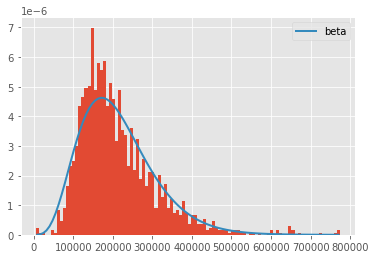

In [15]:
fitter.summary(Nbest=1, plot=True)

###Analisis de variables numericas 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio              1728 non-null   int64  
 1   metros_totales      1728 non-null   float64
 2   antiguedad          1728 non-null   int64  
 3   precio_terreno      1728 non-null   int64  
 4   metros_habitables   1728 non-null   int64  
 5   universitarios      1728 non-null   int64  
 6   dormitorios         1728 non-null   int64  
 7   chimenea            1728 non-null   int64  
 8   banyos              1728 non-null   float64
 9   habitaciones        1728 non-null   int64  
 10  calefaccion         1728 non-null   object 
 11  consumo_calefacion  1728 non-null   object 
 12  desague             1728 non-null   object 
 13  vistas_lago         1728 non-null   object 
 14  nueva_construccion  1728 non-null   object 
 15  aire_acondicionado  1728 non-null   object 
dtypes: flo

In [17]:
df.select_dtypes(include= ["float64", "int64"]).describe().T

,count,mean,std,min,25%,50%,75%,max
precio,1728.0,211966.705440,98441.391015,5000.0,145000.00,189900.00,259000.00,775000.0
metros_totales,1728.0,0.500214,0.698680,0.0,0.17,0.37,0.54,12.2
antiguedad,1728.0,27.916088,29.209988,0.0,13.00,19.00,34.00,225.0
precio_terreno,1728.0,34557.187500,35021.168056,200.0,15100.00,25000.00,40200.00,412600.0
metros_habitables,1728.0,1754.975694,619.935553,616.0,1300.00,1634.50,2137.75,5228.0
universitarios,1728.0,55.567708,10.333581,20.0,52.00,57.00,64.00,82.0
dormitorios,1728.0,3.154514,0.817351,1.0,3.00,3.00,4.00,7.0
chimenea,1728.0,0.601852,0.556102,0.0,0.00,1.00,1.00,4.0
banyos,1728.0,1.900174,0.658352,0.0,1.50,2.00,2.50,4.5
habitaciones,1728.0,7.041667,2.316453,2.0,5.00,7.00,8.25,12.0


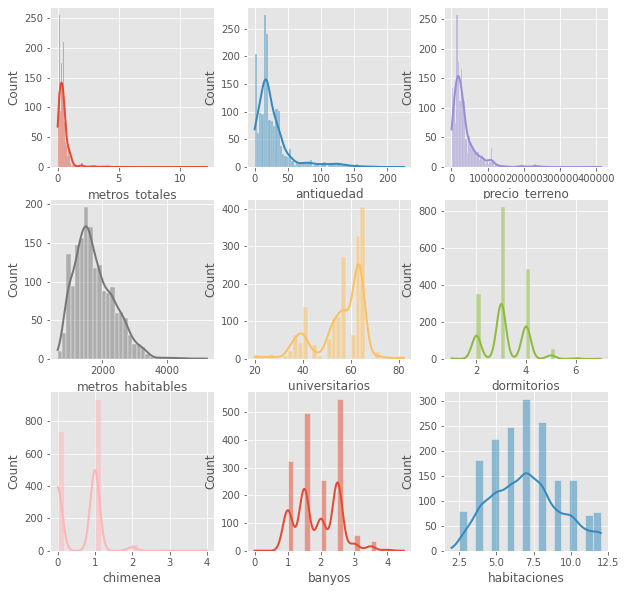

In [18]:
 fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
axes = axes.flat
col_numericas = df.select_dtypes(include=["int64", "float64"]).columns 
col_numericas = col_numericas.drop("precio")

#Histogramas de las variables numericas

for i, colum in enumerate(col_numericas): 
  sns.histplot(
      data = df, 
      x = colum,
      stat = "count", 
      kde = True, 
      color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"], 
      line_kws = {"linewidth" : 2}, 
      ax= axes[i]
      )


In [19]:
df.chimenea.value_counts()


1    942
0    740
2     42
4      2
3      2
Name: chimenea, dtype: int64

In [20]:
df.chimenea = df.chimenea.astype("str")


In [21]:
import matplotlib.ticker as ticker


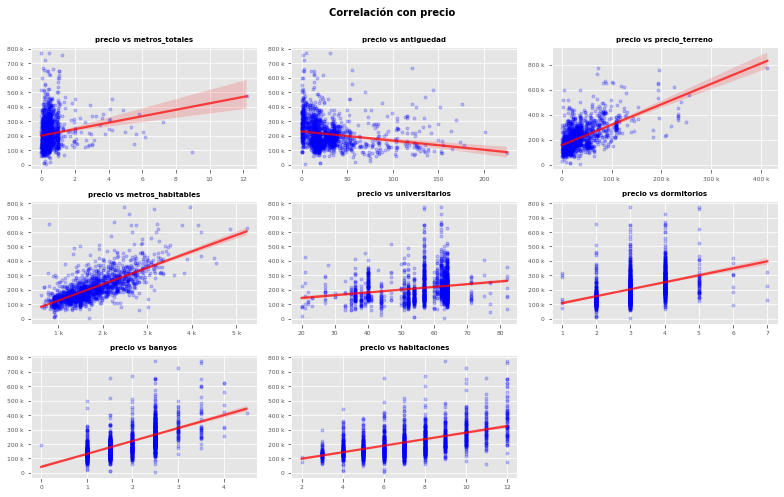

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(11, 7))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['precio'],
        color       = "blue",
        marker      = '.',
        scatter_kws = {"alpha":0.2},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con precio', fontsize = 10, fontweight = "bold");

####correlacion entre las variables numericas

In [23]:
var_num_corr=df.select_dtypes(include= ["float64", "int64"]).corr()
var_num_corr

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones
precio,1.000000,0.158333,-0.188793,0.581266,0.712390,0.200119,0.400349,0.597250,0.531170
metros_totales,0.158333,1.000000,-0.016352,0.059222,0.163450,-0.033148,0.113982,0.084823,0.137604
antiguedad,-0.188793,-0.016352,1.000000,-0.021818,-0.174242,-0.037785,0.027125,-0.361897,-0.082264
precio_terreno,0.581266,0.059222,-0.021818,1.000000,0.423441,0.228427,0.202449,0.297498,0.298865
metros_habitables,0.712390,0.163450,-0.174242,0.423441,1.000000,0.209981,0.656196,0.718564,0.733666
universitarios,0.200119,-0.033148,-0.037785,0.228427,0.209981,1.000000,0.162919,0.179541,0.157068
dormitorios,0.400349,0.113982,0.027125,0.202449,0.656196,0.162919,1.000000,0.458033,0.671863
banyos,0.597250,0.084823,-0.361897,0.297498,0.718564,0.179541,0.458033,1.000000,0.517585
habitaciones,0.531170,0.137604,-0.082264,0.298865,0.733666,0.157068,0.671863,0.517585,1.000000


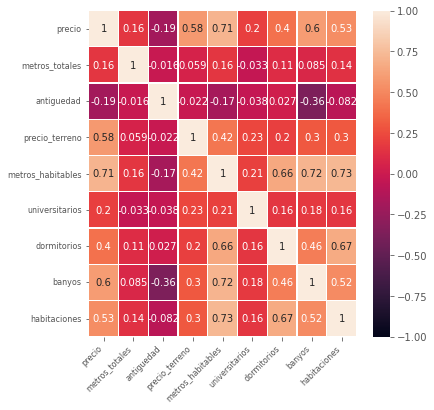

In [24]:
fig, ax = plt.subplots(nrows=1, ncols = 1, figsize = (6,6))

sns.heatmap(data=var_num_corr, vmin=-1, vmax=1, annot=True, linewidths=0.3 )

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

###Analisis de variables cualitativas

In [25]:
df.select_dtypes(include = ["object"]).describe().T

,count,unique,top,freq
chimenea,1728,5,1,942
calefaccion,1728,3,hot air,1121
consumo_calefacion,1728,3,gas,1197
desague,1728,3,public/commercial,1213
vistas_lago,1728,2,No,1713
nueva_construccion,1728,2,No,1647
aire_acondicionado,1728,2,No,1093


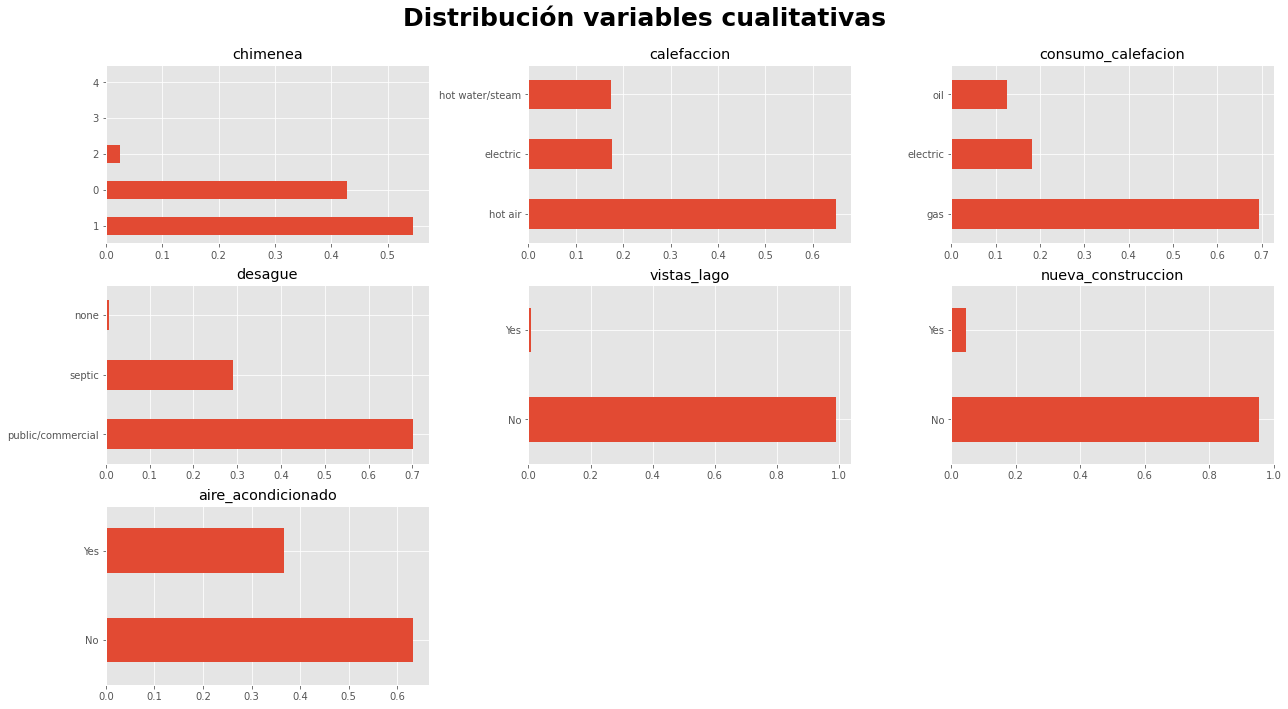

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18,10))
axes = axes.flat
col_cat = df.select_dtypes(include=["object"]).columns 

#graficas de barras de las variables numericas

for i, colum in enumerate(col_cat):
  (df[colum].value_counts()/len(df[colum])).plot.barh(ax=axes[i])
  axes[i].set_title(colum)
  axes[i].set_xlabel("")

#eliminar la grafica vacia
for i in [7,8]: 
  fig.delaxes(axes[i])   

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize= 25, fontweight = "bold");


En la variable *chimenea*  tenemos que muy pocas casas cuentan con 2 o mas chimeneas, por lo que es conveniente dejarlo en una misma variable para que al momento de hacer nuestra validacion cruzada tenga mejores resultados.

In [27]:
df["chimenea"].value_counts().sort_index()

0    740
1    942
2     42
3      2
4      2
Name: chimenea, dtype: int64

In [28]:
dic_replace = { "2" : "2_mas", 
               "3" : "2_mas", 
               "4" : "2_mas"    
}

df["chimenea"] = df["chimenea"].map(dic_replace).fillna(df["chimenea"])

In [29]:
df["chimenea"].value_counts().sort_index()

0        740
1        942
2_mas     46
Name: chimenea, dtype: int64

####Relación precio y variables cualitativas

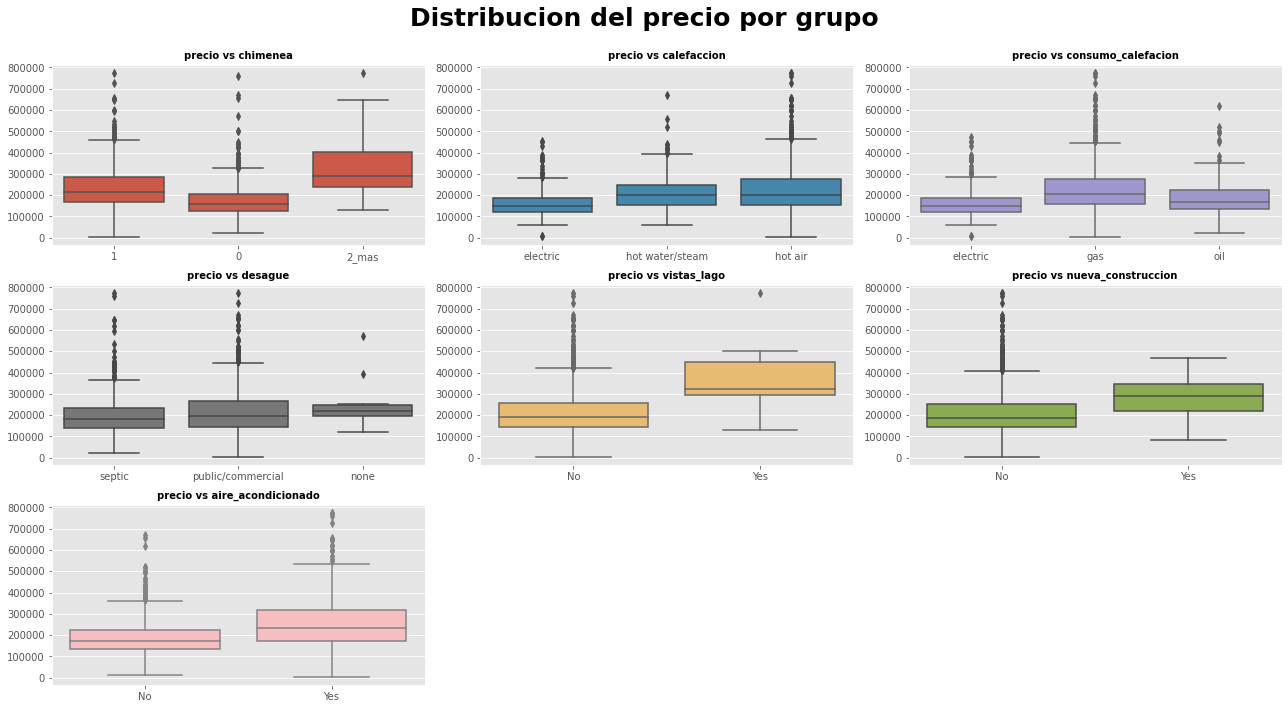

In [30]:
fig, axes = plt.subplots(nrows=3, ncols = 3, figsize= (18,10))
axes = axes.flat
col_cat = df.select_dtypes(include =["object"]).columns

for i, colum in enumerate(col_cat): 
  sns.boxplot(
      x = colum, 
      y = 'precio', 
      data = df, 
      color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"], 
      ax = axes[i]
  )
  axes[i].set_title(f"precio vs {colum}", fontsize = 10, fontweight = "bold")
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')

for i in [7,8]: 
  fig.delaxes(axes[i])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle("Distribucion del precio por grupo", fontsize = 25, fontweight = "bold");

##DIVISIÓN TRAIN Y TEST

Tomaremos todas las variables excepto la variable target "**precio**" como variables independientes.

####train_test_split()


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(df.drop("precio", axis = "columns"), 
                                                     df["precio"], 
                                                     train_size = 0.8, 
                                                     random_state = 1234
                                                      )

Descripcion de los datos de la variable dependiente "**precio**" usados para **entrenar** el modelo

In [32]:
print("Partición de entrenamento")
print("-----------------------")
print(y_train.describe())

Partición de entrenamento
-----------------------
count      1382.000000
mean     211436.516643
std       96846.639129
min       10300.000000
25%      145625.000000
50%      190000.000000
75%      255000.000000
max      775000.000000
Name: precio, dtype: float64


Descripcion de los datos de la variable dependiente "**precio**" usados para **probar** el modelo

In [33]:
print("Partición de test")
print("-----------------------")
print(y_test.describe())

Partición de test
-----------------------
count       346.000000
mean     214084.395954
std      104689.155889
min        5000.000000
25%      139000.000000
50%      180750.000000
75%      271750.000000
max      670000.000000
Name: precio, dtype: float64


##PREPROCESO AL MODELO

El preprocesado engloba todas aquellas transformaciones realizadas sobre los datos con el objetivo que puedan ser interpretados por el algoritmo de machine learning lo más eficientemente posible.

Todo preprocesado de datos debe aprenderse con las observaciones de entrenamiento y luego aplicarse al conjunto de entrenamiento y al de test. Esto es muy importante para no violar la condición de que ninguna información procedente de las observaciones de test participe o influya en el ajuste del modelo. Este principio debe aplicarse también si se emplea validación cruzada (ver más adelante). En tal caso, el preprocesado debe realizarse dentro de cada iteración de validación, para que las estimaciones que se hacen con cada partición de validación no contengan información del resto de particiones. 


Aunque no es posible crear un único listado, a continuación se resumen algunos de los pasos de preprocesado que más se suelen necesitar.

La gran mayoría de algoritmos **no aceptan observaciones incompletas**, por lo que, cuando el set de datos contiene valores ausentes, se puede:


*   Eliminar aquellas observaciones que estén incompletas.

*   Eliminar aquellas variables que contengan valores ausentes.

*   Tratar de estimar los valores ausentes empleando el resto de información disponible (imputación).

Las primeras dos opciones, aunque sencillas, suponen perder información. La eliminación de observaciones solo puede aplicarse cuando se dispone de muchas y el porcentaje de registros incompletos es muy bajo. En el caso de **eliminar** variables, el impacto dependerá de cuánta información aporten dichas variables al modelo. Cuando se emplea la imputación, es muy importante tener en cuenta el riesgo que se corre al introducir valores en predictores que tengan mucha influencia en el modelo. 

El módulo **sklearn.impute** incorpora varios métodos de imputación distintos:


*   **SimpleImputer**: permite imputaciones empleando un valor constante o un estadístico (media, mediana, valor más frecuente) de la misma columna en la que se encuentra el valor ausente.

*   **IterativeImputer**: permite imputar el valor de una columna teniendo en cuenta el resto de columnas. En concreto, se trata de un proceso iterativo en el que, en cada iteración, una de las variables se emplea como variable respuesta y el resto como predictores. Una vez obtenido el modelo, se emplea para predecir las posiciones vacías de esa variable. Este proceso se lleva a cabo con cada variable y se repite el ciclo max_iter veces para ganar estabilidad. La implementación de sklearn.impute.IterativeImputer permite que se emplee casi cualquiera de sus algoritmos para crear los modelos de imputación (KNN, RandomForest, GradientBoosting...).

*   **KNNImputer**: es un caso concreto de IterativeImputer en el que se emplea k-Nearest Neighbors como algoritmo de imputación.



A pesar de ser un método muy utilizado, imputar utilizando KNN presenta dos problemas: 

1. su coste computacional elevado hace que solo sea aplicable en conjuntos de datos de tamaño pequeño o moderado. 

2. Si hay variables categóricas, debido a la dificultad de medir "distancias" en este contexto, puede dar lugar a resultados poco realistas.

Por estas dos razones, es más recomendable utilizar un modelo tipo Random Forest **IterativeImputer(predictor = RandomForestRegressor()).**

Con el argumento **add_indicator=True** se crea automáticamente una nueva columna en la que se indica con el valor 1 qué valores han sido imputados. Esto puede ser útil tanto para identificar las observaciones en las que se ha realizado alguna imputación como para utilizarla como un predictor más en el modelo.

###Exclusión de variables con varianza próxima a cero


**No se deben incluir en el modelo predictores que contengan un único valor** (cero-varianza) ya que no aportan información.

 Tampoco es conveniente incluir predictores que tengan una varianza próxima a cero, es decir, predictores que toman solo unos pocos valores, de los cuales, algunos aparecen con muy poca frecuencia. 

El problema con estos últimos es que pueden convertirse en predictores con varianza cero cuando se dividen las observaciones por validación cruzada o bootstrap.

###Estandarización y escalado de variables numéricas

Cuando los predictores son numéricos, **la escala** en la que se miden, así como la magnitud de su varianza pueden **influir** en gran medida en el modelo. Muchos algoritmos de machine learning (SVM, redes neuronales, lasso...) son sensibles a esto, de forma que, si no se igualan de alguna forma los predictores, aquellos que se midan en una escala mayor o que tengan más varianza **dominarán el modelo** aunque no sean los que más relación tienen con la variable respuesta. 

Existen principalmente 2 estrategias para evitarlo:
1. Centrado: consiste en restarle a cada valor la media del predictor al que pertenece. Si los datos están almacenados en un dataframe, el centrado se consigue restándole a cada valor la media de la columna en la que se encuentra. Como resultado de esta transformación, todos los predictores pasan a tener una media de cero, es decir, los valores se centran en torno al origen. StandardScaler(with_std=False)
2. Normalización (estandarización): consiste en transformar los datos de forma que todos los predictores estén aproximadamente en la misma escala. Hay dos formas de lograrlo: 
  1. Normalización Z-score (StandardScaler): dividir cada predictor entre su desviación típica después de haber sido centrado, de esta forma, los datos pasan a tener una distribución normal.

  $$z=\frac{x−\mu}{\sigma}$$
 
  2. Estandarización max-min (MinMaxScaler): transformar los datos de forma que estén dentro del rango [0, 1].

$$X_{norm}=\frac{X−X_{min}}{X_{max}−X_{min}}$$
 
Nunca se deben estandarizar las variables después de ser binarizadas (ver a continuación).

###Binarización de las variables cualitativas
La binarización (one-hot-encoding) consiste en **crear nuevas variables** *dummy* con cada uno de los niveles de las variables cualitativas.

 Por ejemplo, una variable llamada color que contenga los niveles rojo, verde y azul, se convertirá en tres nuevas variables (color_rojo, color_verde, color_azul), todas con el valor 0 excepto la que coincide con la observación, que toma el valor 1.

Por defecto, la clase OneHotEncoder binariza todas las variables, por lo que hay que aplicarlo únicamente a las variables cualitativas (ver como hacerlo en el apartado ColumnTransformer). Con el argumento drop=‘first’ se elimina uno de los niveles para evitar redundancias.

En ciertos escenarios puede ocurrir que, en los datos de test, aparezca un nuevo nivel que no estaba en los datos de entrenamiento. Si no se conoce de antemano cuáles son todos los posibles niveles, se puede evitar errores en las predicciones indicando OneHotEncoder(handle_unknown='ignore').

La forma de preprocesar los datos dentro del ecosistema scikit-learn es empleando los ColumnTransformer y pipeline. Además de las ya mencionadas, pueden encontrarse muchas más transformaciones de preprocesado en el módulo sklearn.preprocessing.


###Pipeline y ColumnTransformer
Las clases **ColumnTransformer** y **make_column_transformer** del módulo *sklearn.compose* permiten combinar múltiples transformaciones de preprocesado, especificando a qué columnas se aplica cada una. Como todo transformer, tiene un método de entrenamiento (fit) y otro de transformación (transform) . Esto permite que el aprendizaje de las transformaciones se haga únicamente con observaciones de entrenamiento, y se puedan aplicar después a cualquier conjunto de datos. La idea detrás de este módulo es la siguiente:

1. Definir todas las transformaciones (escalado, selección, filtrado...) que se desea aplicar y a qué columnas ColumnTransformer(). La selección de columnas puede hacerse por: nombre, índice, máscara booleana, slice, patrón regex, por tipo de columna o con las funciones de selección *make_column_selector*.

2. Aprender los parámetros necesarios para dichas transformaciones con las observaciones de entrenamiento .fit().

3. Aplicar las transformaciones aprendidas a cualquier conjunto de datos .transform().

In [34]:
# Selección de las variables por típo
# ==============================================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector


 

Se estandarizan las columnas numéricas y se hace one-hot-encoding de las 
columnas cualitativas. 

Para mantener las columnas a las que no se les aplica 
ninguna transformación se tiene que indicar **remainder='passthrough'**.

In [35]:
#definimos las columnas numericas en una variable
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()

#definimos las columnas categoricas en otra variable
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

In [36]:
#preprocesamiento de las columnas.
#se normaliza la escala de las columnas numericas con StandardScaler() 
#y las columnas categoricas se dividen en columnas de valores binarios 0 y 1 
#usando OneHotEncoder(). 

#al resto de columnas no se les aplica ninguna transformacion
preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols),
                    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                remainder='passthrough')

definimos los conjuntos de variables independientes ya procesados para que nuestro modelo tenga el mejor comportamiento y sea el optimo. 

In [37]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

El resultado devuelto por ColumnTransformer es un numpy array, por lo que se pierden los nombres de las columnas. Suele ser interesante poder inspeccionar cómo queda el set de datos tras el preprocesado en formato dataframe. Por defecto, OneHotEncoder ordena las nuevas columnas de izquierda a derecha por orden alfabético.

In [38]:
# Convertir el output en dataframe y añadir el nombre de las columnas
# ==============================================================================
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
datos_train_prep = preprocessor.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   metros_totales               1382 non-null   float64
 1   antiguedad                   1382 non-null   float64
 2   precio_terreno               1382 non-null   float64
 3   metros_habitables            1382 non-null   float64
 4   universitarios               1382 non-null   float64
 5   dormitorios                  1382 non-null   float64
 6   banyos                       1382 non-null   float64
 7   habitaciones                 1382 non-null   float64
 8   chimenea_0                   1382 non-null   float64
 9   chimenea_1                   1382 non-null   float64
 10  chimenea_2_mas               1382 non-null   float64
 11  calefaccion_electric         1382 non-null   float64
 12  calefaccion_hot air          1382 non-null   float64
 13  calefaccion_hot wa

**ColumnTransformer** aplica las operaciones de forma paralela, no de forma secuencial, esto significa que no permite aplicar más de una transformación a una misma columna. En el caso de que sea necesario hacerlo, hay que recurrir a los pipeline, que también agrupan operaciones pero las ejecutan de forma secuencial, de forma que la salida de una operación es la entrada de la siguiente. **Si se quieren aplicar varias transformaciones de preprocesado sobre una misma columna, es necesario agruparlas primero en un pipeline** 


En el siguiente ejemplo se combinan las transformaciones:

1. **Columnas numéricas:** se imputan los valores ausentes con la mediana y a continuación se estandarizan.

2. **Columnas categóricas (cualitativas):** se imputan los valores ausentes con el valor más frecuente y a continuación se aplica one hot encoding.

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

In [40]:
# Selección de las variables por típo
# ==============================================================================

numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Transformaciones para las variables numéricas
#aplicamos dos transformaciones: StandarScaler() y SimpleImputer()
numeric_transformer = Pipeline(
                        steps=[
                            ('imputer', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())
                        ]
                      )


# Transformaciones para las variables categóricas
#aplicamos dos transformaciones: OneHotEncoder() y SimpleImputer()
categorical_transformer = Pipeline(
                            steps=[
                                ('imputer', SimpleImputer(strategy='most_frequent')),
                                ('onehot', OneHotEncoder(handle_unknown='ignore'))
                            ]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

In [41]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [42]:
# Convertir el output en dataframe y añadir el nombre de las columnas
# ==============================================================================

encoded_cat = preprocessor.named_transformers_['cat']['onehot']\
              .get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
datos_train_prep = preprocessor.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   metros_totales               1382 non-null   float64
 1   antiguedad                   1382 non-null   float64
 2   precio_terreno               1382 non-null   float64
 3   metros_habitables            1382 non-null   float64
 4   universitarios               1382 non-null   float64
 5   dormitorios                  1382 non-null   float64
 6   banyos                       1382 non-null   float64
 7   habitaciones                 1382 non-null   float64
 8   chimenea_0                   1382 non-null   float64
 9   chimenea_1                   1382 non-null   float64
 10  chimenea_2_mas               1382 non-null   float64
 11  calefaccion_electric         1382 non-null   float64
 12  calefaccion_hot air          1382 non-null   float64
 13  calefaccion_hot wa

In [43]:
#from sklearn import set_config
#set_config(display='diagram')

#preprocessor

##CREAR UN MODELO 

El siguiente paso tras definir los datos de entrenamiento, es seleccionar el algoritmo que se va a emplear. En *scikit-learn*, esto se hace mediante la creación de un objeto estimator. En concreto, este objeto almacena el nombre del algoritmo, sus parámetros e hiperparámetros y contiene los métodos fit(X, y) y predict(T) que le permiten aprender de los datos y predecir nuevas observaciones. El siguiente listado contiene todos los algoritmos implementados en scikit-learn.

###ENTRENAMIENTO

Se ajusta un primer modelo de regresión lineal con regularización ridge para predecir el precio de la vivienda en función de todos los predictores disponibles. Todos los argumentos de sklearn.linear_model.Ridge se dejan por defecto.

Es importante tener en cuenta que, cuando un modelo de regresión lineal incluye regularización en los coeficientes (ridge, lasso, elasticnet), deben estandarizarse los predictores. Para asegurar que el preprocesado se realiza únicamente con los datos de entrenamiento, se combinan las transformaciones y el entrenamiento en un mismo pipeline.

In [44]:
from sklearn.linear_model import Ridge

# Preprocesado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

In [45]:
# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

In [46]:
# Train
# ==============================================================================
# Se asigna el resultado a _ para que no se imprima por pantalla
_ = pipe.fit(X=X_train, y=y_train)

###VALIDACIÓN

La finalidad última de un modelo es predecir la variable respuesta en observaciones futuras o en observaciones que el modelo no ha "visto" antes. El error mostrado por defecto tras entrenar un modelo suele ser el error de entrenamiento, **el error que comete el modelo al predecir las observaciones que ya ha "visto"**. Si bien estos errores son útiles para entender cómo está aprendiendo el modelo (estudio de residuos), no es una estimación realista de cómo se comporta el modelo ante nuevas observaciones (el error de entrenamiento suele ser demasiado optimista). Para conseguir una estimación más certera, y antes de recurrir al conjunto de test, se pueden **emplear estrategias de validación basadas en resampling**. Scikit-learn incorpora en el módulo sklearn.model_selection varias estrategias de validación.

**Todas ellas reciben como primer argumento un estimator que puede ser directamente un modelo o un pipeline.**

Las métricas de error de regresión se devuelven siempre en negativo de forma que, cuanto más próximo a 0 sea el valor, mejor el ajuste. Esto es así para que, los procesos de optimización siempre sean de maximización.

La forma más sencilla es emplear la función cross_val_score(), que utiliza por defecto KFold.

####Validación cruzada con cross_val_score()

In [47]:
# Validación cruzada
# ==============================================================================
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )

print(f"Métricas validación cruzada: {cv_scores}")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Métricas validación cruzada: [-53936.97817183 -53076.74364513 -62746.15219054 -65963.09754244
 -48929.66260476]
Média métricas de validación cruzada: -56930.52683094099


También es posible utilizar otras estrategias de validación cruzada (KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit) realizando previamente el reparto con las funciones auxiliares de sklearn.model_selection y pasando los índices al argumento cv.

Cada método funciona internamente de forma distinta, pero todos ellos se basan en la idea: ajustar y evaluar el modelo de forma repetida, empleando cada vez distintos subconjuntos creados a partir de los datos de entrenamiento y obteniendo en cada repetición una estimación del error. **El promedio de todas las estimaciones tiende a converger en el valor real del error de test.**

####validacion cruzada repetida con RepeatedKFold()

In [48]:
# Validación cruzada repetida
# ==============================================================================
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv
             )

print(f"Métricas de validación cruzada: {cv_scores}")
print("")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Métricas de validación cruzada: [-66487.72274814 -56333.87119132 -48992.85039086 -55030.00923381
 -58790.48472729 -62651.67080028 -55779.2103529  -61820.5882113
 -57243.1819794  -48910.70385765 -50033.46929956 -51586.8240037
 -62478.2206031  -65111.86204296 -54900.98944223 -64220.39882006
 -53694.93490461 -64690.99877883 -51242.27642488 -52330.80605289
 -56777.05219272 -58644.60923875 -55573.25900549 -64350.25804164
 -50578.15339623]

Média métricas de validación cruzada: -57130.176229624776


####Cross validate

La función **cross_validate()** es similar a cross_val_score() pero **permite estimar varias métricas a la vez**, tanto para test como para train, y devuelve los resultados en un diccionario.

In [49]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================
from sklearn.model_selection import cross_validate

cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = cv,
                return_train_score = True
            )

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.038052,0.012730,0.632359,0.679758,-64605.636258,-51789.256510
1,0.022335,0.013084,0.718708,0.636812,-48322.428406,-59983.019196
2,0.021912,0.012425,0.595874,0.689939,-58434.926618,-55213.669996
3,0.021904,0.012347,0.672969,0.655316,-58179.173708,-55331.536238
4,0.026899,0.012244,0.615521,0.683390,-60148.310664,-54366.426683
5,0.021561,0.011732,0.650829,0.664771,-53812.579173,-57561.184588
6,0.034018,0.013135,0.698178,0.647441,-49813.241120,-59221.407345
7,0.020966,0.011225,0.646554,0.673016,-61749.477863,-53221.315710
8,0.020776,0.011822,0.615151,0.682999,-59192.994923,-54895.180113
9,0.021402,0.012349,0.645685,0.670425,-61061.033083,-53843.654748


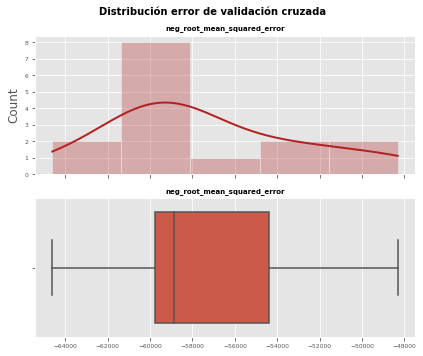

In [50]:
# Distribución del error de validación cruzada
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), sharex=True)

#histograma del error por media cuadrada negativa del conjunto de prueba "test"
sns.histplot(
    data    = cv_scores['test_neg_root_mean_squared_error'],
    stat    = "count",
    kde     = True,
    line_kws= {'linewidth': 2},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0]
)

axes[0].set_title('neg_root_mean_squared_error', fontsize = 7, fontweight = "bold")
axes[0].tick_params(labelsize = 6)
axes[0].set_xlabel("")

#boxplot del error por media cuadrada negativa del conjunto de prueba "test"

sns.boxplot(
    cv_scores['test_neg_root_mean_squared_error'],
    ax      = axes[1]
)
axes[1].set_title('neg_root_mean_squared_error', fontsize = 7, fontweight = "bold")
axes[1].tick_params(labelsize = 6)
axes[1].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución error de validación cruzada', fontsize = 10,
             fontweight = "bold");

####cross_val_predict()

La función cross_val_predict, en lugar de devolver la métrica de cada partición, devuelve las **predicciones de cada partición.** Esto es útil para poder evaluar los residuos del modelo y diagnosticar su comportamiento. Si se emplea validación cruzada repetida o bootstrapping, una misma observación puede formar parte de la partición de validación varias veces.

In [51]:
# Diagnóstico errores (residuos) de las predicciones de validación cruzada
# ==============================================================================
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
import statsmodels.api as sm


In [52]:
# Validación cruzada
# ==============================================================================
cv = KFold(n_splits=5, random_state=123, shuffle=True)
cv_prediccones = cross_val_predict(
                    estimator = pipe,
                    X         = X_train,
                    y         = y_train,
                    cv        = cv
                  )


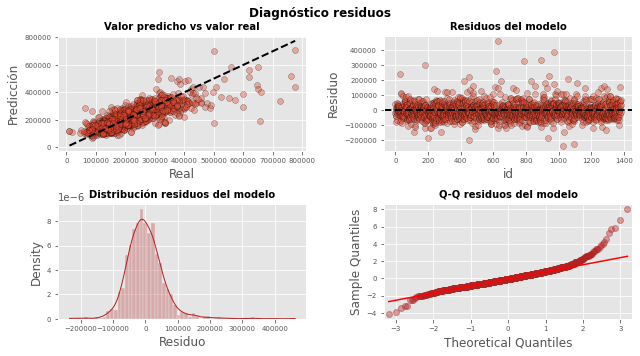

In [53]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))

#grafico de dispersion de los valores dependientes de entrenamiento reales vs los valores predichos por cv 
axes[0, 0].scatter(y_train, cv_prediccones, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

#grafico de dispersion id del valor vs diferencia (o residuo) entre el valor predicho y el real.
axes[0, 1].scatter(list(range(len(y_train))), y_train - cv_prediccones,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

#histograma de la distribucion del residuo encontrado entre el valor predicho y el real.
sns.histplot(
    data    = y_train - cv_prediccones,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)

#grafica de cuantiles predichos vs cuantiles reales
sm.qqplot(
    y_train - cv_prediccones,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

#### Validación cruzada repetida paralelizada (multicore)


A efectos prácticos, cuando se aplican métodos de resampling para validar un modelo hay que tener en cuenta dos cosas: el coste computacional que implica ajustar múltiples veces un modelo, cada vez con un subconjunto de datos distinto, y la reproducibilidad en la creación de las particiones. Las funciones cross_val_score() y cross_val_predict() ***permiten paralelizar el proceso mediante el argumento*** **n_jobs**.

In [54]:
# Validación cruzada repetida paralelizada (multicore)
# ==============================================================================
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv,
                n_jobs    = -1 # todos los cores disponibles
             )

print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Média métricas de validación cruzada: -56735.77500472445


El *root_mean_squared_error* promedio estimado mediante validación cruzada para el modelo ridge es de 56735. Este valor será contrastado más adelante cuando se calcule el error del modelo con el conjunto de test.

###PREDICCIÓN

Una vez que el modelo ha sido entrenado, bien empleando directamente un *estimator* o un *pipeline*, con el método **.predict()** se pueden predecir nuevas observaciones. Si se emplea un pipeline, se aplican automáticamente las transformaciones aprendidas durante el entrenamiento.

In [55]:
predicciones = pipe.predict(X_test)

In [56]:
# Se crea un dataframe con las predicciones y el valor real
df_predicciones = pd.DataFrame({'precio' : y_test, 'prediccion' : predicciones})
df_predicciones.head()

,precio,prediccion
903,105000,112491.665253
208,113000,185142.195564
358,110500,168900.516039
1187,159000,139333.302565
319,215000,236967.476884


###ERROR DEL TEST

Aunque mediante los métodos de validación (Kfold, LeaveOneOut) se consiguen buenas estimaciones del error que tiene un modelo al predecir nuevas observaciones, la mejor forma de evaluar un modelo final es **prediciendo un conjunto test**, es decir, un conjunto de observaciones que se ha mantenido al margen del proceso de entrenamiento y optimización. Dependiendo del problema en cuestión, pueden ser interesantes unas métricas Anexo 2  u otras. El módulo sklearn.metrics incorpora una variedad considerable de métricas para evaluar la calidad de las predicciones.

In [57]:
# neg_root_mean_squared_error de test
# ==============================================================================
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
rmse

65372.916389239625

Al hacer la validacion estimamos que, usando la validacion cruzada repetida, el *rmse* del modelo era de 56735, un proximo al obtenido con el conjunto de test 65372.

###MODELOS DE MACHINE LEARNING

####K-NEAREST NEIGHBOR (KNN)

K-Nearest Neighbor es uno de los algoritmos de machine learning más simples. Su funcionamiento es el siguiente: para **predecir** una observación se *identifican las K observaciones del conjunto de entrenamiento que más se asemejan a ella* (en base a sus predictores) *y se emplea como valor predicho el promedio de la variable respuesta en dichas observaciones.* Dada su sencillez, suele dar peores resultados que otros algoritmos, pero es un buen referente como baseline. Usaremos su versión como regresor **KNeighborsRegressor**

In [58]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor

Agrupamos *las transformaciones de preprocesamiento* aplicadas a las columnas numericas y categoricas y *el modelo* de prediccion en un mismo pipeline. 

In [59]:
pipe = Pipeline(
    [("preprocessing", 
    preprocessor), 
     ("modelo", KNeighborsRegressor()
     )]
)

 Optimización de hiperparámetros


In [60]:
import multiprocessing


In [61]:
# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {'modelo__n_neighbors': np.linspace(1, 100, 500, dtype=int)}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__n_neighbors,mean_test_score,std_test_score,mean_train_score,std_train_score
12,7,-61529.076634,3016.175044,-52969.612273,1098.310984


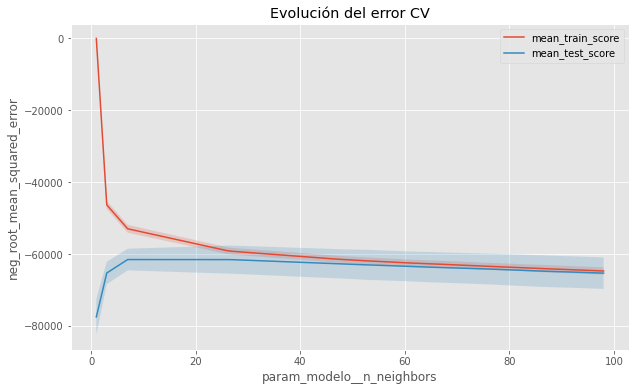

In [62]:
# Gráfico resultados validación cruzada para cada hiperparámetro
fig, ax = plt.subplots(figsize=(10, 6))
hiperparametro = 'param_modelo__n_neighbors'
resultados = resultados.sort_values(hiperparametro, ascending = False)
metrica    = grid.scoring

resultados.plot(hiperparametro, 'mean_train_score', ax=ax)
resultados.plot(hiperparametro, 'mean_test_score', ax=ax)
ax.fill_between(resultados[hiperparametro].astype(np.int),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados[hiperparametro].astype(np.int),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel(metrica);

In [63]:
# Error de test del modelo final
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_knn = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print(f"El error (rmse) de test es: {rmse_knn}")

El error (rmse) de test es: 67303.99640453797


####REGRESION LINEAL (RIDGE Y LASSO)



La regresión lineal es un método estadístico que trata de modelar la relación lineal entre una variable continua (variable dependiente, respuesta o dependiente) y una o más variables independientes (regresores o predictores) mediante el ajuste de una ecuación lineal. Se llama regresión lineal simple cuando solo hay una variable independiente y regresión lineal múltiple cuando hay más de una.

El modelo de regresión lineal (Legendre, Gauss, Galton y Pearson) considera que, dado un conjunto de observaciones, la media  μ  de la variable respuesta  Y  se relaciona de forma lineal con la o las variables regresoras  X  acorde a la ecuación:

$$\mu_γ=\beta_0+\beta_1x_1+\beta_2x_2+...+\beta_px_p$$
 
o en notación matricial (incorporando  $\beta_0$  en el vector $\beta$ ):

$$\mu_γ = X^T β $$
 
Además, el modelo lineal puede incluir regularización durante su ajuste, por lo que también incluye los modelos ridge regression, lasso y elastic net.

Scikit-Learn incorpora 3 tipos de regularización para los modelos lineales con el objetivo de evitar overfitting, reducir varianza y atenuar el efecto de la correlación entre predictores. Por lo general, aplicando regularización se consigue modelos con mayor poder predictivo (generalización).

1. **El modelo lasso** es un modelo lineal por mínimos cuadrados que incorpora una regularización que penaliza la suma del valor absolutos de los coeficientes de regresión  (||β||1=∑pk=1|βk|) . A esta penalización se le conoce como l1 y tiene el efecto de forzar a que los coeficientes de los predictores tiendan a cero. Dado que un predictor con coeficiente de regresión cero no influye en el modelo, lasso consigue seleccionar los predictores más influyentes. El grado de penalización está controlado por el hiperparámetro  λ . Cuando  λ=0 , el resultado es equivalente al de un modelo lineal por mínimos cuadrados ordinarios. A medida que  λ  aumenta, mayor es la penalización y más predictores quedan excluidos.

2. **El modelo ridge** es un modelo lineal por mínimos cuadrados que incorpora una regularización que penaliza la suma de los coeficientes elevados al cuadrado. A esta penalización se le conoce como l2 y tiene el efecto de reducir de forma proporcional el valor de todos los coeficientes del modelo pero sin que estos lleguen a cero. Al igual que lasso, el grado de penalización está controlado por el hiperparámetro  λ .

La principal diferencia práctica entre lasso y ridge es que el primero consigue que algunos coeficientes sean exactamente cero, por lo que realiza selección de predictores, mientras que el segundo no llega a excluir ninguno. Esto supone una ventaja notable de lasso en escenarios donde no todos los predictores son importantes para el modelo y se desea que los menos influyentes queden excluidos. Por otro lado, cuando existen predictores altamente correlacionados (linealmente), **ridge reduce la influencia de todos ellos a la vez y de forma proporcional**, mientras que** lasso tiende a seleccionar uno de ellos, dándole todo el peso y excluyendo al resto.** En presencia de correlaciones, esta selección varía mucho con pequeñas perturbaciones (cambios en los datos de entrenamiento), por lo que, **las soluciones de lasso, son muy inestables si los predictores están altamente correlacionados.**

Para conseguir un equilibrio óptimo entre estas dos propiedades, se puede emplear lo que se conoce como *penalización elastic net*, que combina ambas estrategias.

In [64]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', ElasticNet())])



In [65]:
# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {'modelo__alpha': np.logspace(-5, 5, 500)}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)
# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
9,0.00484586,-56874.665435,4869.885384,-55939.318724,1207.14027


In [66]:
# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {'modelo__alpha': np.logspace(-5, 5, 500)}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)
# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
9,0.00484586,-57012.387237,5014.778327,-55919.898918,1229.128304


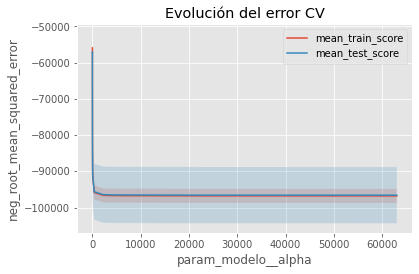

In [67]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 3.84))
hiperparametro = 'param_modelo__alpha'
resultados = resultados.sort_values(hiperparametro, ascending = False)
metrica    = grid.scoring

resultados.plot(hiperparametro, 'mean_train_score', ax=ax)
resultados.plot(hiperparametro, 'mean_test_score', ax=ax)
ax.fill_between(resultados[hiperparametro].astype(np.int),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados[hiperparametro].astype(np.int),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel(metrica);

In [68]:
# Error de test del modelo final
# ==============================================================================
#elegimos los mejores parametros del grid
modelo_final = grid.best_estimator_
#predecimos los valores usando el modelo con los mejores parametros 
predicciones = modelo_final.predict(X = X_test)

#rmse
rmse_lm = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print(f"El error (rmse) de test es: {rmse_lm}")

El error (rmse) de test es: 65406.060314055336


####RANDOM FOREST

In [69]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

In [70]:
# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', RandomForestRegressor())])



In [ ]:
# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro

param_distributions = {
    'modelo__n_estimators': [50, 100, 1000, 2000],
    'modelo__max_features': ["auto", 3, 5, 7],
    'modelo__max_depth'   : [None, 3, 5, 10, 20]
}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

In [ ]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_rf = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_rf}")

####GRADIENT BOOSTING TREES

Un modelo **Gradient Boosting Trees**  está formado por un conjunto de árboles de decisión individuales, entrenados de forma secuencial, de forma que cada nuevo árbol trata de mejorar los errores de los árboles anteriores. La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', GradientBoostingRegressor())])


In [ ]:

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro

param_distributions = {
    'modelo__n_estimators': [50, 100, 1000, 2000],
    'modelo__max_features': ["auto", 3, 5, 7],
    'modelo__max_depth'   : [None, 3, 5, 10, 20],
    'modelo__subsample'   : [0.5,0.7, 1]
}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

In [ ]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_gbm = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_gbm}")

In [ ]:
df_predicciones = pd.DataFrame({'precio' : y_test, 'prediccion' : predicciones})
modelo_final.score

In [ ]:
from tabulate import tabulate

scores = [ ["KNeighborsRegressor", rmse_knn], ["Linear Model", rmse_lm], ["Gradient Boosting Trees", rmse_gbm], ["Random Forest Regressor", rmse_rf]]
print(tabulate(scores, headers=["modelos", "error cuadrático medio"]))

por lo tanto, el modelo que nos dio mejores resultados fue el de **Random Forest Regressor**.
